In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [2]:
def trainKNN(df, k):
    X = df[['feature1','feature2']]
    y = df['class']
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)
    return clf, df, k

In [3]:
def plotKNNStatisticSurface(clf, df, k):
    f1_min, f1_max = df['feature1'].min() - 0.2, df['feature1'].max() + 0.2
    f2_min, f2_max = df['feature2'].min() - 0.2, df['feature2'].max() + 0.2
    ff1, ff2 = np.meshgrid(np.arange(f1_min, f1_max, 0.02), np.arange(f2_min, f2_max, 0.02))
    X_test = np.c_[ff1.ravel(), ff2.ravel()]
    Z = clf.predict_proba(X_test)
    Z = Z[:,1]
    Z = Z.reshape(ff1.shape)
    Z_contour = clf.predict(X_test)
    Z_contour = Z_contour.reshape(ff1.shape)
    plt.figure(dpi=150)
    colors = ['azure', 'royalblue']
    cm = LinearSegmentedColormap.from_list('my', colors, N=k+1)
    plt.contour(ff1, ff2, Z_contour, colors='gold', linewidths=1)
    plt.pcolormesh(ff1, ff2, Z, cmap=cm)
    plt.colorbar()
    plt.scatter(df[df['class']==0]['feature1'],df[df['class']==0]['feature2'],c='b',s=5,label='$H_0$')
    plt.scatter(df[df['class']==1]['feature1'],df[df['class']==1]['feature2'],c='orangered',s=5,label='$H_1$')
    plt.legend()
    plt.xlim(f1_min, f1_max)
    plt.ylim(f2_min, f2_max)
    plt.title("2-Class classification (k = %i)"% k)
    plt.show()

In [4]:
def plotROC(clf, df, k, plot=True):
    scores = clf.predict_proba(df[['feature1','feature2']])[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(df['class'], scores)
    P_H1 = len(df[df['class']==1])/len(df)
    P_H0 = len(df[df['class']==0])/len(df)
    P_cd = P_H1 * tpr + P_H0 * (1 - fpr)
    P_cd_max = P_cd.max()
    P_cd_idxmax = np.argmax(P_cd)
    plt.figure(dpi=150)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr[P_cd_idxmax], tpr[P_cd_idxmax], marker='s',label='max $P_{cd}$=%.3f' %P_cd_max)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('$P_{FA}$')
    plt.ylabel('$P_D$')
    plt.legend(loc="lower right")
    plt.title('Receiver Operating Characteristic (k = %i)'% k)
    if plot:
        plt.show()
    else:
        plt.close()
    P_cd_min = 1 - P_cd_max
    return P_cd_min

In [5]:
train_df = pd.read_csv("dataSetHorseshoes.csv", names=['class','feature1','feature2'])
test_df = pd.read_csv("dataSetHorseshoesTest.csv", names=['class','feature1','feature2'])

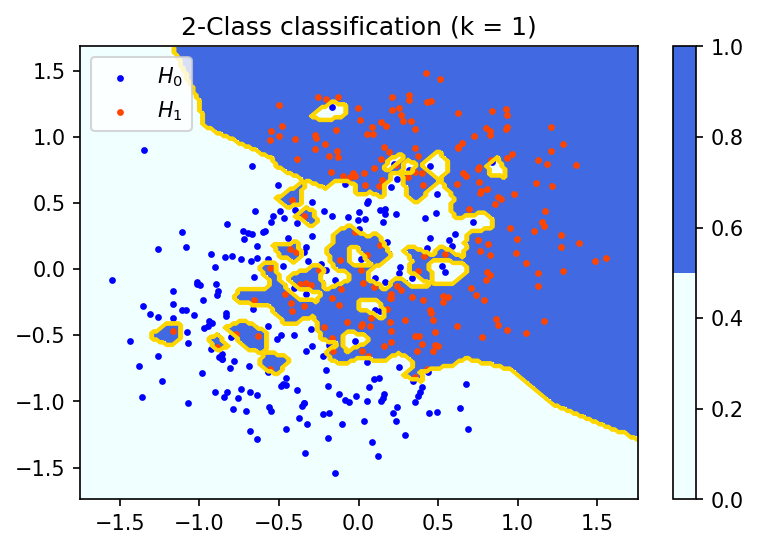

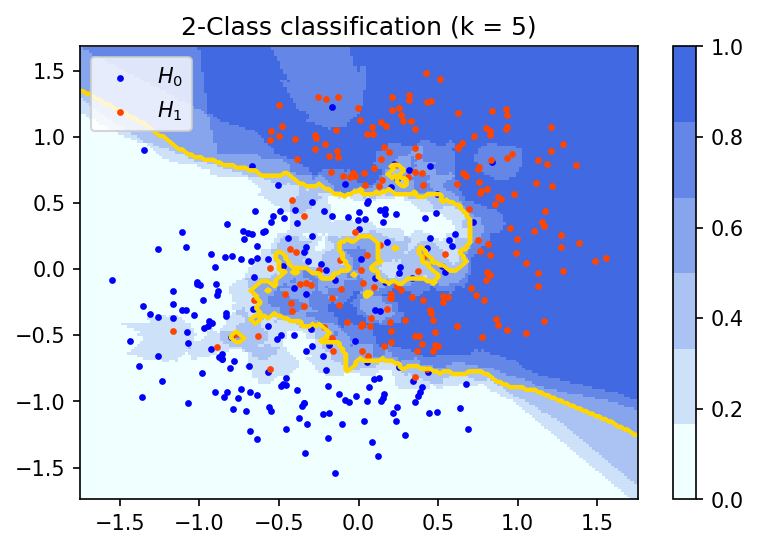

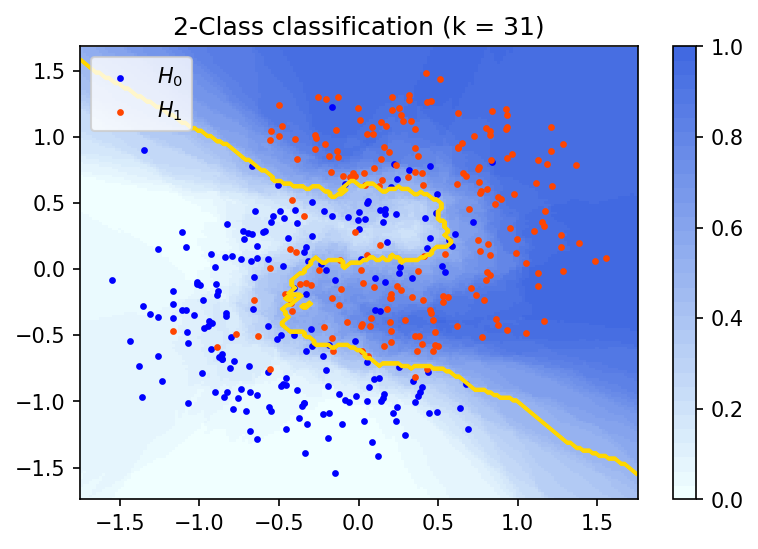

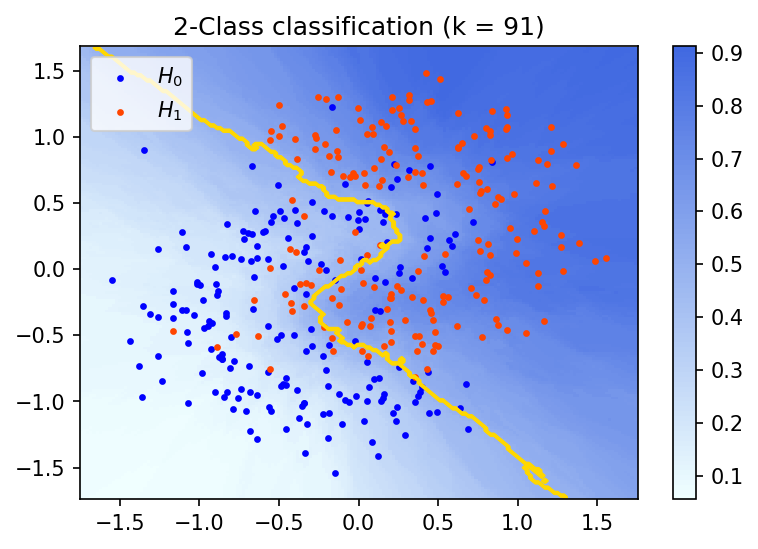

In [6]:
for i in [1,5,31,91]:
    clf, df, k = trainKNN(train_df, i)
    plotKNNStatisticSurface(clf, df, k)

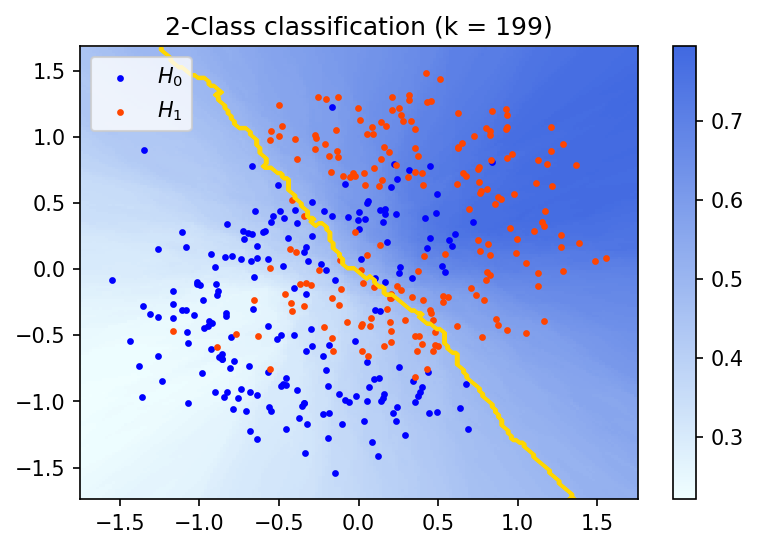

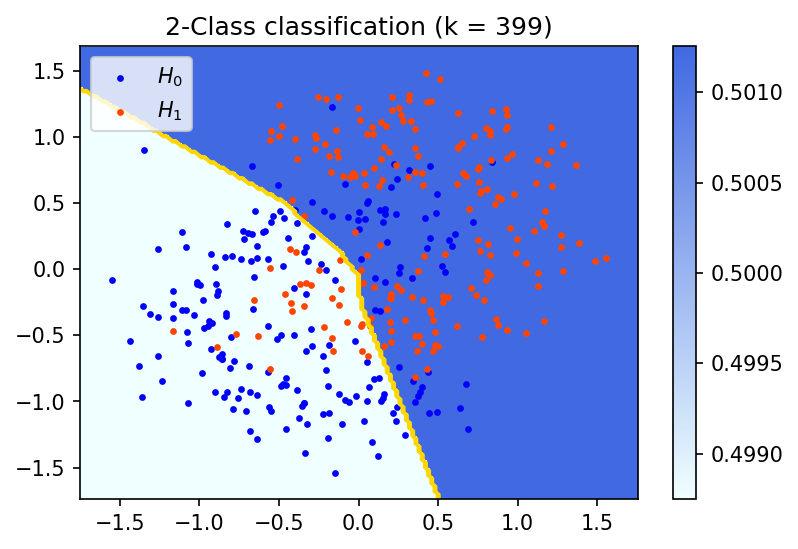

In [7]:
N = len(train_df)
for i in [N//2 - 1, N -1]:
    clf, df, k = trainKNN(train_df, i)
    plotKNNStatisticSurface(clf, df, k)

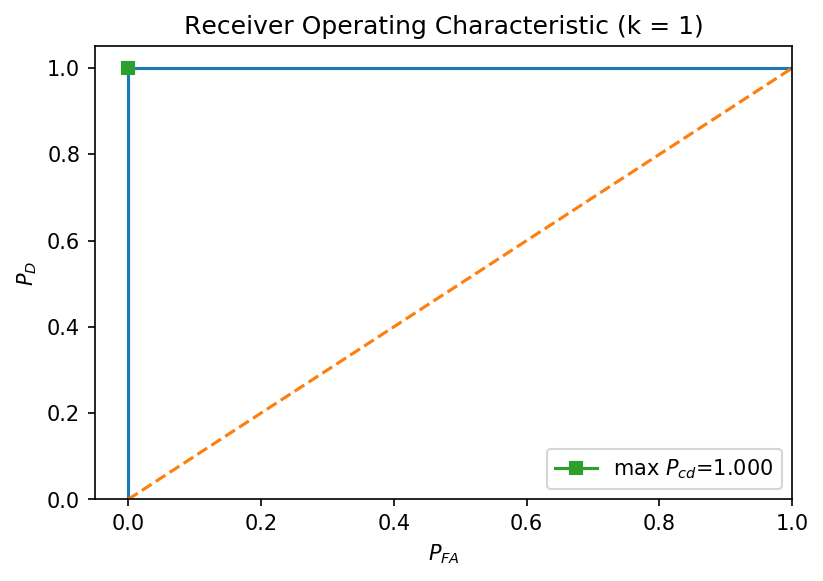

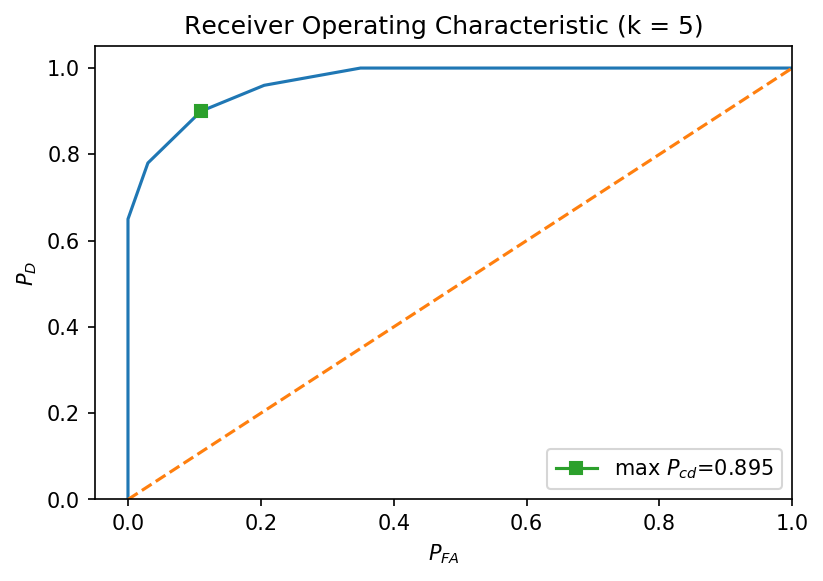

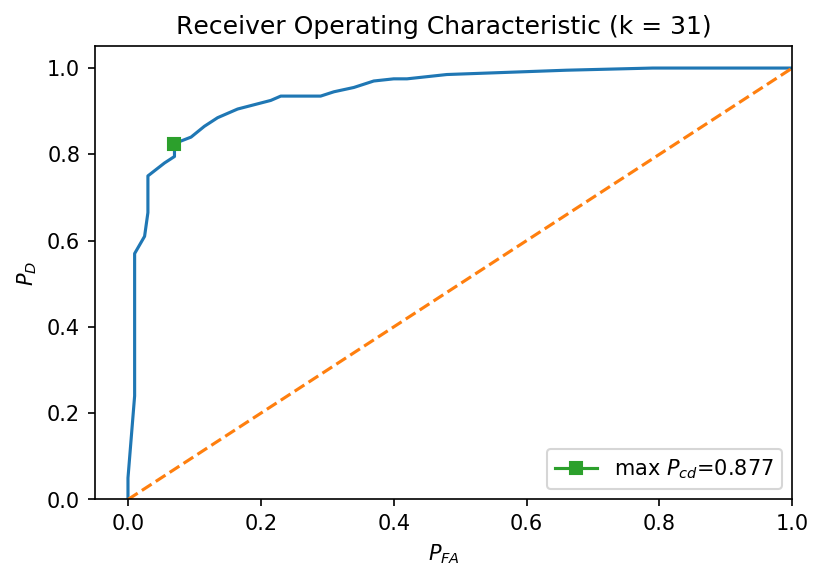

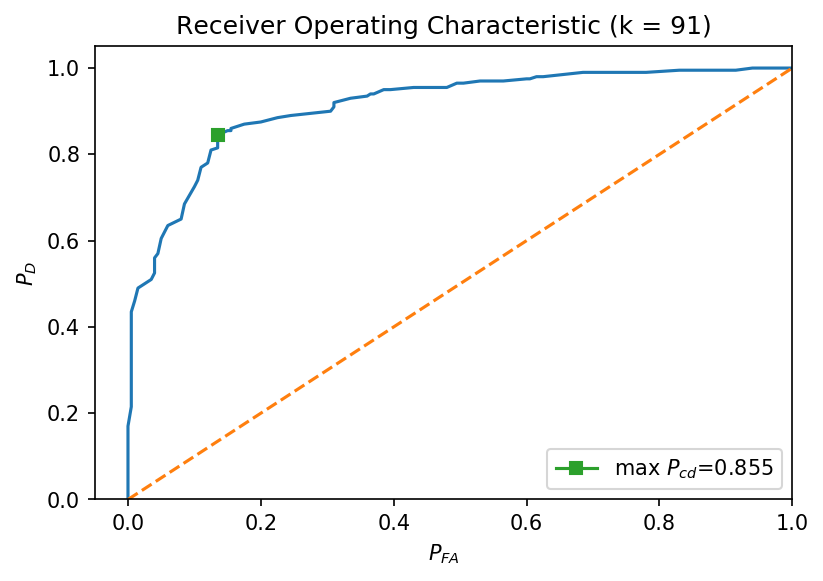

In [8]:
for i in [1,5,31,91]:
    clf, df, k = trainKNN(train_df, i)
    plotROC(clf, df, k)

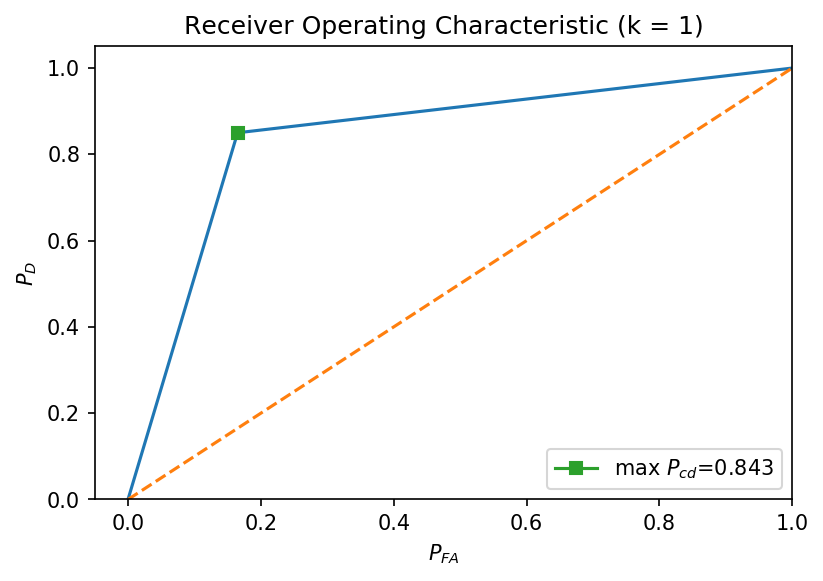

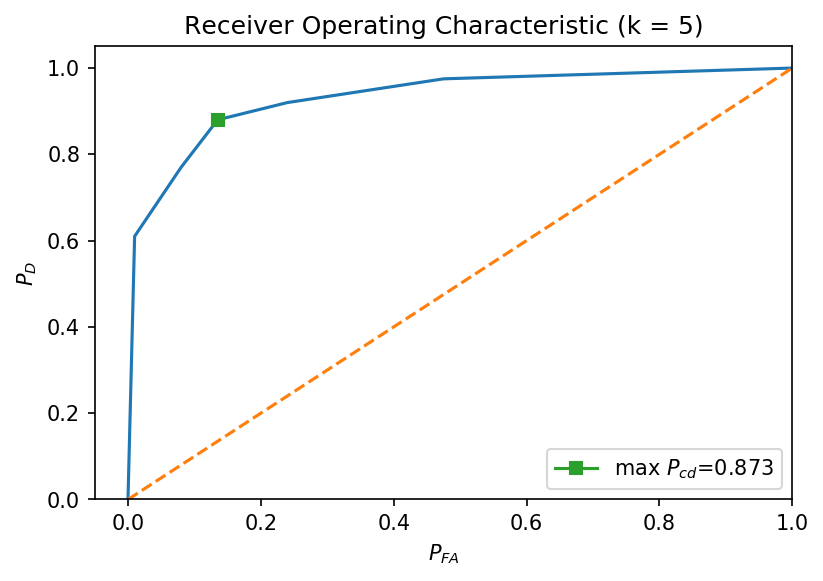

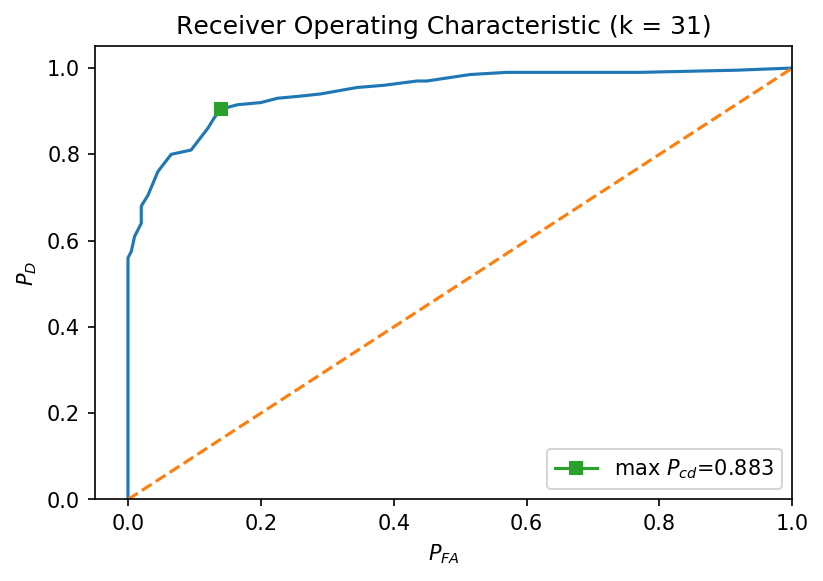

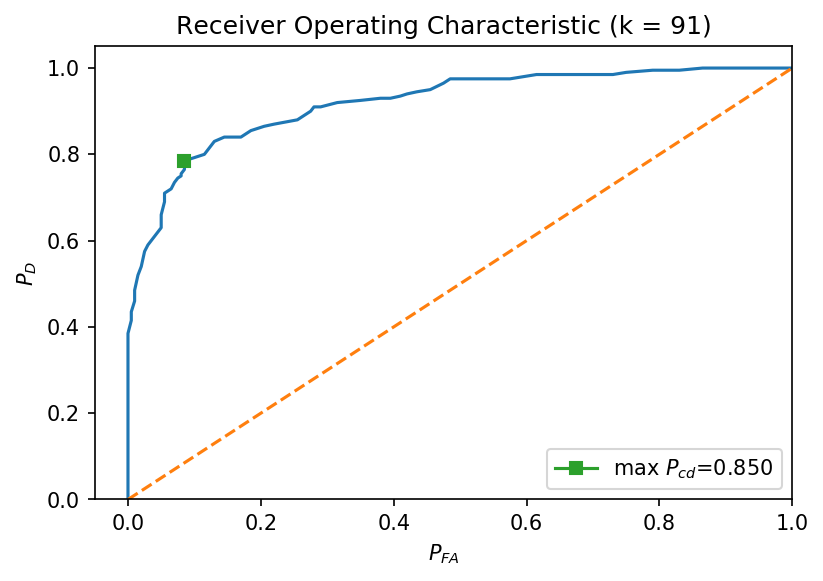

In [9]:
for i in [1,5,31,91]:
    clf, df, k = trainKNN(train_df, i)
    plotROC(clf, test_df, k)

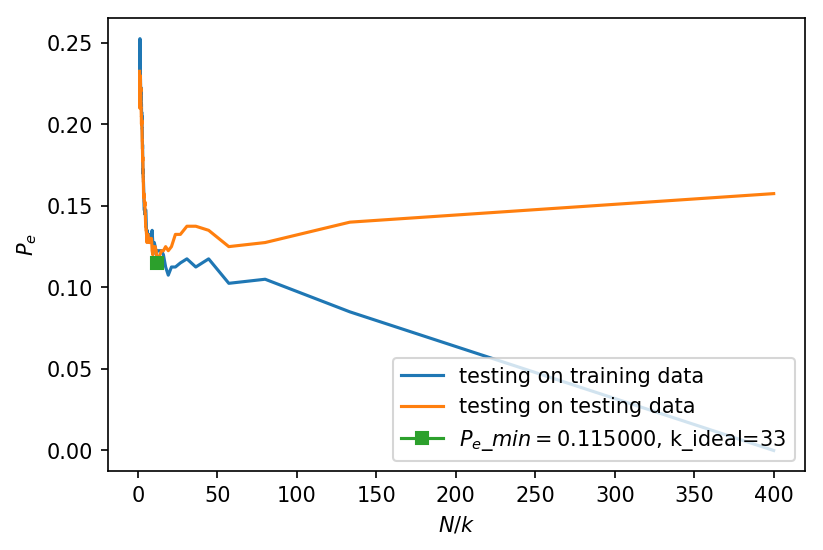

In [22]:
P_e_list = np.zeros(200)
P_e_list2 = np.zeros(200)
for i in range(1,400,2):
    clf, df, k = trainKNN(train_df, i)
    P_e = plotROC(clf, df, k, plot=False)
    P_e_list[int((i-1)/2)] = P_e
for i in range(1,400,2):
    clf, df, k = trainKNN(train_df, i)
    P_e = plotROC(clf, test_df, k, plot=False)
    P_e_list2[int((i-1)/2)] = P_e
x = np.arange(1,400,2)
x = 400 / x
test_min = P_e_list2.min()
min_index = P_e_list2.argmin()
k_ideal = min_index * 2 + 1
plt.figure(dpi=150)
plt.xlabel('$N/k$')
plt.ylabel('$P_e$')
plt.plot(x, P_e_list, label='testing on training data')
plt.plot(x, P_e_list2, label='testing on testing data')
plt.plot(400/k_ideal, test_min, marker='s', label='$P_e\_min=%3f$, k_ideal=%d' %(test_min, k_ideal))
plt.legend(loc="lower right")
plt.show()